In [1]:
import os
import glob
from pathlib import Path
import json
import numpy as np
import nussl
import torch
from nussl.datasets import transforms as nussl_tfm
from common import utils, argbind
import matplotlib.pyplot as plt
from nussl.ml.networks.modules import AmplitudeToDB, BatchNorm, RecurrentStack, Embedding
from nussl.separation.base import MaskSeparationBase, DeepMixin, SeparationException
from torch import nn
# from torch.nn.utils import weight_norm
from ignite.engine import Events, Engine, EventEnum
from nussl.ml import SeparationModel
from nussl.ml.networks.modules import (
    Embedding, DualPath, DualPathBlock, STFT, Concatenate,
    LearnedFilterBank, AmplitudeToDB, RecurrentStack,
    MelProjection, BatchNorm, InstanceNorm, ShiftAndScale
)
from torch import optim

utils.logger()

In [2]:
main_folder = "./trained_models"
# names = ["all_audio", "all_post", "audio_post_aligns", "audio_post_no_norm", 
names = ["all_audio", "audio_post_aligns", "audio_post_no_norm", 
          "audio_post_no_norm_larger", "audio_post_norm"]
models = []
for name in names:
    models.append(torch.load(os.path.join(main_folder, name,  
                    "checkpoints", "latest.model.pth")))

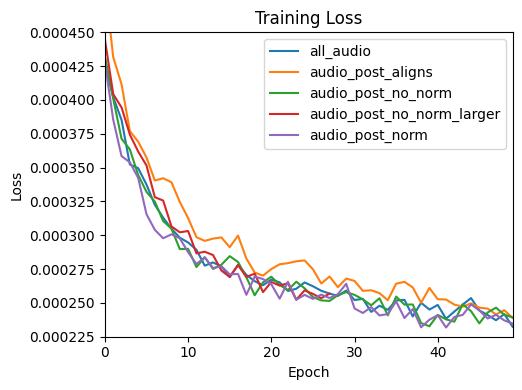

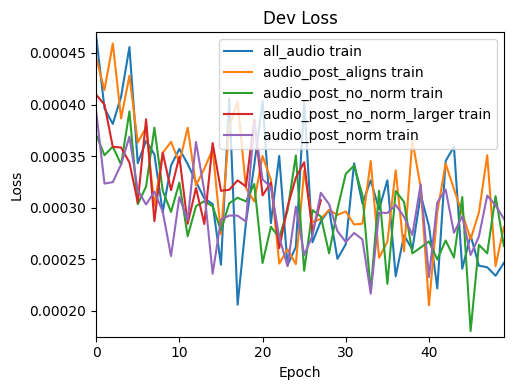

In [3]:
plt.figure(figsize=(5, 4))
plt.subplot(111)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.tight_layout()
plt.ylim([.000225, .000450])
plt.xlim([0, 49])
for i, model in enumerate(models): 
    data = model["metadata"]["trainer.state.epoch_history"]
    plt.plot(data['train/L1Loss'], label=(names[i]))
plt.legend()
plt.show()

plt.figure(figsize=(5, 4))
plt.subplot(111)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Dev Loss')
plt.tight_layout()
plt.ylim([.000175, .00047])
plt.xlim([0, 49])
for i, model in enumerate(models): 
    data = model["metadata"]["trainer.state.epoch_history"]
    plt.plot(data['validation/L1Loss'], label=(names[i]+" train"))
plt.legend()
plt.show()



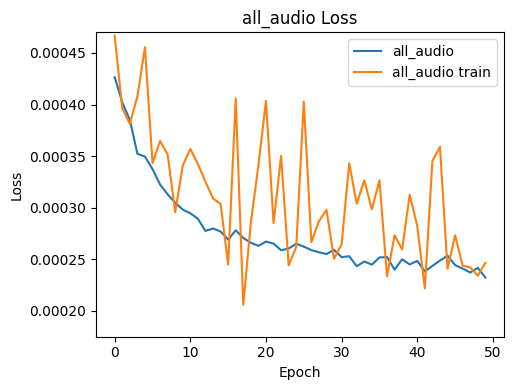

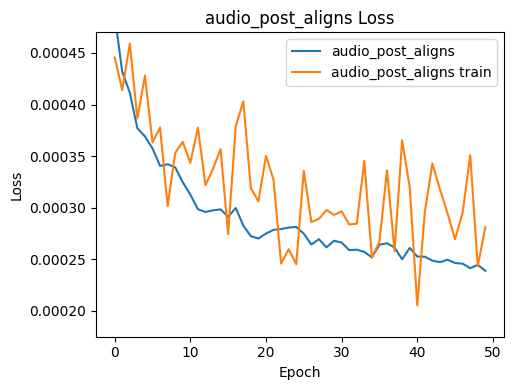

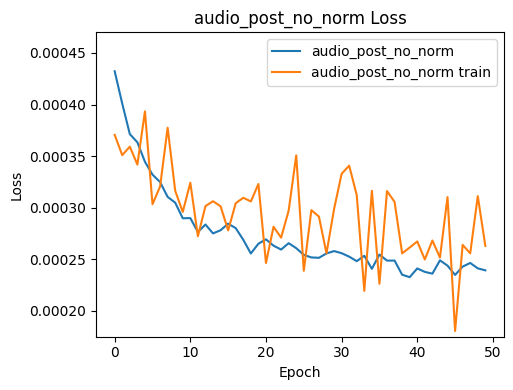

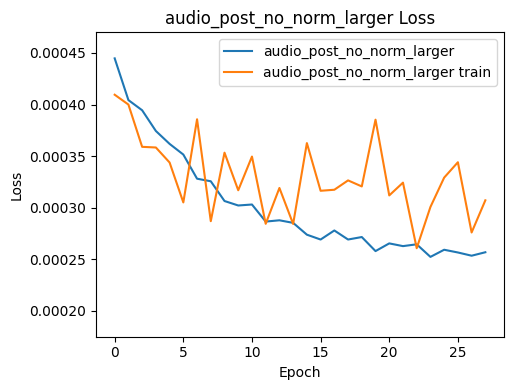

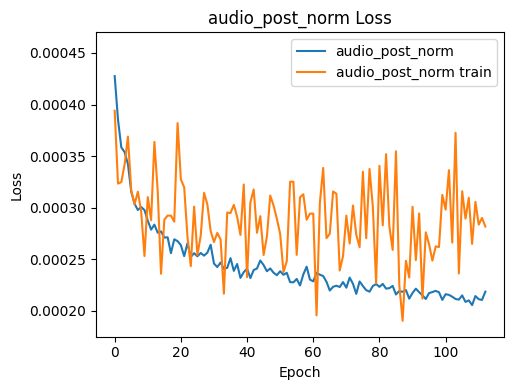

In [4]:
for i, model in enumerate(models): 
    plt.figure(figsize=(5, 4))
    plt.subplot(111)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'{names[i]} Loss')
    plt.tight_layout()
    plt.ylim([.000175, .00047])
    # plt.xlim([0, 49])
    data = model["metadata"]["trainer.state.epoch_history"]
    plt.plot(data['train/L1Loss'], label=(names[i]))
    plt.plot(data['validation/L1Loss'], label=(names[i]+" train"))
    plt.legend()
    plt.show()

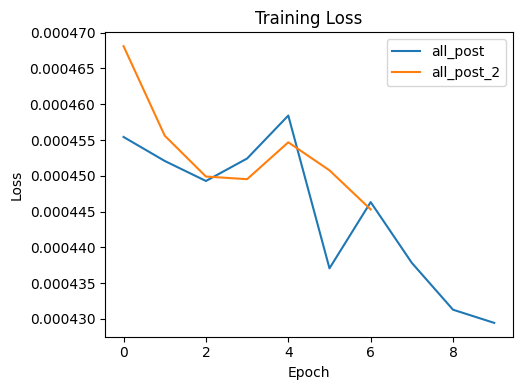

In [5]:
names = ["all_post", "all_post_2"]
models = []
for name in names:
    models.append(torch.load(os.path.join(main_folder, name,  
                    "checkpoints", "latest.model.pth")))

plt.figure(figsize=(5, 4))
plt.subplot(111)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.tight_layout()
# plt.ylim([.000225, .000450])
# plt.xlim([0, 49])
for i, model in enumerate(models): 
    data = model["metadata"]["trainer.state.epoch_history"]
    plt.plot(data['train/L1Loss'], label=(names[i]))
plt.legend()
plt.show()

# for i, model in enumerate(models): 
#     plt.figure(figsize=(5, 4))
#     plt.subplot(111)
#     plt.xlabel('Epoch')
#     plt.ylabel('Loss')
#     plt.title(f'{names[i]} Loss')
#     plt.tight_layout()
#     plt.ylim([.000175, .00047])
#     # plt.xlim([0, 49])
#     data = model["metadata"]["trainer.state.epoch_history"]
#     plt.plot(data['train/L1Loss'], label=(names[i]))
#     plt.plot(data['validation/L1Loss'], label=(names[i]+" train"))
#     plt.legend()
#     plt.show()